# VIEWS-FAO Starter Notebook
**Index**
- Introduction
- Running main.py
- Importing our libraries
- Setting up paths 
- Importing you local functions
- Importing the data
- Using the get_time_period function
- Using the date_index function
- Using the country_id_by_name function
- Using the contry_name_by_id_fuction 
- Using the contry time series plot
- Using the country period map 

## Introduction


**If you have made it this far** but not read the /docs/glossary go read the glossary now. Then come back. I'll still be here. Also, if anything decision-wise or conceptual seems unclear please see if you can find you answer in /docs/ADRs. And before working on this repo please read the /docs/guide_to_git_in_vs_code, /docs/md&d_python_style_guide, and the /docs/contributing_guidelines. 

**Welcome back**. This notebook is a quick guide showcasing of we can interact quickly with the VIEWS-FAO data using a number of prebuild functions. You are of course free to interact with the data as you see fit; the functions here presented are simply for convinience. 

## Running main.py

**If you have not yet run main.py** please go do so. You can ofcourse get the VIEWS-FAO data throug the Google Cloud Storage links provided on the repositories root README, but the main.py interface will give you more choises and information. For instace it will allow you check wheter your data is in the expected dir, how your library versions compare to those used by the developers of this repo, and allow you to download and process the data directly (this currently takes as long as 20min beacuse a host of different test are applyed to test the intecgrety of the data and the transformations involoved in the procesing steps. Furture version will allow you to forego these test but as we are still in very active development the test are considerd mandatory). 

**Welcome back!** Hopefully main.py was able to execute flawlessly and you're all set up now. If you were not able to excure main.py to your saticfationc see the root README fill for cotact infomations to the project owner and teamlead of this repo.

**Let's move on!**

## Import the relevant libreries

This should not be new to you and hopefully you have already varified in main.py that you have all the relevant libreries, and resnoble versions, installed on the enviroment you are going to run this notebook with.  

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns

import os
from pathlib import Path
import sys


print(np.__version__) # 1.26.4 used
print(pd.__version__) # 2.2.2 used
print(scipy.__version__) # 1.12.0 used
print(matplotlib.__version__) # 3.8.0 used
print(sns.__version__) # 0.13.2 used

1.26.4
2.2.2
1.12.0
3.8.0
0.13.2


**To avoid setting up local paths manually** the VIEWS MD&D team uses a spefic script wich is activeated as seen below (note that there is a small subtle difference in how this should be implemented in a script versus a notebook)

In [2]:
# Jupyter Notebook solution  --------------------------------------------------------------------------------------------
notebook_dir = os.getcwd() # notebook specific
notebook_name = "starter_notebook.ipynb" # notebook specific name

PATH = Path(notebook_dir) / Path(notebook_name) # notebook specific

# alt script version -----------------------------------------------------------------------------------------------------
# PATH = Path(__file__)

# Common for notebooks and scripts alike
sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths, get_plot_path
setup_project_paths(PATH)


**This sets up the path structure meaning that we can import util and management funcitons etc. whereever we are working in the repo. As seen above we also import a number of functions to give us speficfic paths. 

Lets try the ´get_data_paths´

In [3]:

PATH_RAW_VIEWSER, PATH_RAW_EXTERNAL, PATH_PROCESSED, PATH_GENERATED = get_data_paths(PATH)

# lest print the paths
print(PATH_RAW_VIEWSER)
print(PATH_RAW_EXTERNAL)
print(PATH_PROCESSED)
print(PATH_GENERATED) 

/home/simon/Documents/scripts/VIEWS_FAO_index/data/raw_viewser
/home/simon/Documents/scripts/VIEWS_FAO_index/data/raw_external
/home/simon/Documents/scripts/VIEWS_FAO_index/data/processed
/home/simon/Documents/scripts/VIEWS_FAO_index/data/generated


This is were you wanne fetch and store you data. Hopefully you'll see that these paths are all **automatically tailored to you machine and folder structure.**

Let's look at some more:

In [4]:
PLOT_PATH = get_plot_path(PATH)

print(PLOT_PATH)

/home/simon/Documents/scripts/VIEWS_FAO_index/reports/plots


This is where you wanna store you plots. 

If you need to setup more costum repo paths you can start with root thus:

In [5]:
PATH_ROOT = setup_root_paths(PATH)

print(PATH_ROOT)

/home/simon/Documents/scripts/VIEWS_FAO_index


And expande as you see fit using the pathlib (proxypath) syntax (don't go rogue and do you own thing, please - you PR will not be approved)

In [6]:
PATH_STARTER_NOTEBOOK = PATH_ROOT / 'notebooks/guides/starter_notebook.ipynb'
print(PATH_STARTER_NOTEBOOK)

/home/simon/Documents/scripts/VIEWS_FAO_index/notebooks/guides/starter_notebook.ipynb


# Importing the data
If the date is downloaded, processed, and corectly located you should now be able to import both the monthly and yearly dataframe thus:

In [7]:
# load the data from the pkl
df_monthly = pd.read_pickle(PATH_GENERATED / "df_monthly_country_return_periods.pkl")
df_yearly = pd.read_pickle(PATH_GENERATED / "df_yearly_country_return_periods.pkl")

Note how we use the PATH_GENERATED and then the file name to generate the full path. 
We can take a quick look at the data:

In [8]:
df_monthly.columns

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'sb_best', 'ns_best', 'os_best', 'pop_gpw_sum', 'total_best',
       'fatalities_per_100k', 'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')

In [9]:
df_monthly.head(10)

,month_id,pg_id,month,year_id,c_id,col,row,sb_best,ns_best,os_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
0,109,62356,1,1989,192,436,87,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,109,79599,1,1989,192,399,111,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,109,79600,1,1989,192,400,111,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,109,79601,1,1989,192,401,111,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
4,109,80317,1,1989,192,397,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
5,109,80318,1,1989,192,398,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
6,109,80319,1,1989,192,399,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
7,109,80320,1,1989,192,400,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
8,109,80321,1,1989,192,401,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
9,109,80322,1,1989,192,402,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


In [10]:
df_monthly.describe()

,month_id,pg_id,month,year_id,c_id,col,row,sb_best,ns_best,os_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
count,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,...,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06
mean,3.185000e+02,1.447941e+05,6.500000e+00,2.006000e+03,1.418858e+02,4.076765e+02,2.015367e+02,2.073385e-01,3.191184e-02,1.885889e-01,...,7.009011e+00,1.022721e+00,2.645854e+00,1.335458e-02,1.928862e+00,8.610657e-03,2.513040e+00,1.248284e-02,3.080509e+00,1.531546e-02
std,1.212432e+02,2.670816e+04,3.452053e+00,1.009951e+01,6.561906e+01,3.667092e+01,3.709581e+01,7.682069e+01,2.910317e+00,1.108309e+02,...,5.143155e+02,1.719783e+00,2.806759e+02,1.041708e+00,2.619333e+02,8.762650e-01,2.896182e+02,1.036234e+00,2.973130e+02,1.097988e+00
min,1.090000e+02,6.235600e+04,1.000000e+00,1.989000e+03,4.000000e+01,3.100000e+02,8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.137500e+02,1.264360e+05,3.750000e+00,1.997000e+03,7.000000e+01,3.830000e+02,1.760000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.185000e+02,1.494575e+05,6.500000e+00,2.006000e+03,1.570000e+02,4.100000e+02,2.080000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.232500e+02,1.660120e+05,9.250000e+00,2.015000e+03,2.130000e+02,4.350000e+02,2.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.280000e+02,1.905110e+05,1.200000e+01,2.023000e+03,2.540000e+02,4.870000e+02,2.650000e+02,1.219150e+05,2.000000e+03,1.784590e+05,...,3.654000e+05,4.204996e+02,1.000000e+05,2.400000e+02,1.000000e+05,2.400000e+02,1.000000e+05,2.400000e+02,1.000000e+05,2.400000e+02


In [11]:
df_yearly.columns

Index(['pg_id', 'year_id', 'c_id', 'row', 'col', 'sb_best', 'ns_best',
       'os_best', 'pop_gpw_sum', 'total_best', 'fatalities_per_100k',
       'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')

In [12]:
df_yearly.head(10)

,pg_id,year_id,c_id,row,col,sb_best,ns_best,os_best,pop_gpw_sum,total_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
0,62356,1989,192,87,436,0.0,0.0,0.0,0.000000,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,79599,1989,192,111,399,0.0,0.0,0.0,3890.091064,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,79600,1989,192,111,400,0.0,0.0,0.0,2452.416016,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,79601,1989,192,111,401,0.0,0.0,0.0,11328.425781,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
4,80317,1989,192,112,397,0.0,0.0,0.0,313145.781250,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
5,80318,1989,192,112,398,0.0,0.0,0.0,722217.375000,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
6,80319,1989,192,112,399,0.0,0.0,0.0,51746.175781,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
7,80320,1989,192,112,400,0.0,0.0,0.0,13658.141602,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
8,80321,1989,192,112,401,0.0,0.0,0.0,17416.437500,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
9,80322,1989,192,112,402,0.0,0.0,0.0,18555.277344,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


In [13]:
df_yearly.describe()

,pg_id,year_id,c_id,row,col,sb_best,ns_best,os_best,pop_gpw_sum,total_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
count,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,4.587190e+05,458719.000000,...,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000
mean,144783.774962,2006.003348,141.598658,201.522381,407.660784,2.488759,0.383045,2.263667,8.622384e+04,5.135471,...,6.440192,1.016191,2.479950,0.012452,1.859744,0.008607,2.366154,0.011772,2.760514,0.014039
std,26704.645974,10.097913,65.557662,37.090966,36.663870,307.790353,15.495974,464.096339,2.633476e+05,558.577782,...,148.679420,0.477601,87.149993,0.425740,79.930868,0.362643,85.589556,0.416964,89.329927,0.445431
min,62356.000000,1989.000000,40.000000,87.000000,310.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126435.000000,1997.000000,70.000000,176.000000,383.000000,0.000000,0.000000,0.000000,3.522424e+03,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149456.000000,2006.000000,157.000000,208.000000,410.000000,0.000000,0.000000,0.000000,2.196521e+04,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,166009.000000,2015.000000,213.000000,231.000000,435.000000,0.000000,0.000000,0.000000,7.715432e+04,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190511.000000,2023.000000,246.000000,265.000000,487.000000,157317.000000,5374.000000,229102.000000,1.241601e+07,229104.000000,...,30450.000000,35.501806,10000.000000,32.000000,10000.000000,32.000000,10000.000000,32.000000,10000.000000,32.000000


If everything looks as you expect, let's move on.

## Import local functions
After having run the setup_project_paths above, importing local functions is straight forward. Two things should be noted:
1) Must functions occupy there own srcipt only accompanied by small check- and helper funcetions.
2) We never user ´from script import *´. Instead we are always explict in what is imported: ´from script import function1, function2´ this helps with debugging and development as it makes it much esier to figure out where individual funtions and scripts resides. 

Now, on with it:

In [14]:
from utils_get_time_period import get_time_period
from utils_date_index import calculate_date_from_index
from utils_get_country_id_by_name import get_country_id_by_name
from utils_get_country_names_by_ids import get_country_names_by_ids
from utils_plotting_country_time_series import plot_country_time_series
from utils_plotting_country_period_map import plot_country_period_map

Nothing to it. We'll no go through each function one by one.

# Using the get_time_period function
A simple functions that will return the feature/column representing the time period in the specifc Dataframe. This will give a different result depending on wheter we are working on a monthly or yearly dataframe.

In [15]:
time_period = get_time_period(df_monthly)
print(time_period)

month_id


In [16]:
time_period = get_time_period(df_yearly)
print(time_period)

year_id


This funciton is mainly use to make other functions robust enough to take borh kinds of dataframes and process/plot them correctly. 

# Using the date_index function

For the yearly dataset the year_id is simple the year, e.g. "1991". This does not leave a lot of room for confusion. The monthly dataset, however, has both a "month" and a "month_id" feature. Here, "month" in 1-12 rerpesenting January thorug December. However, "month_id" is a unique monthly id were 121 is January 1991. Making the head math to figure out which month and yaer a specifc month_id corrosponde to is tiresome some here is a function that does that: 

In [17]:
month_id = 515
date = calculate_date_from_index(month_id)
print(date)

11.2022


This is convienet both for analysis, checks, and annotation/labling in plots.

# Using the country_id_by_name function

Similar to the month_id there exist a contry id (c_id). This also an intenger and it's not intuative and trivial to figure out which contry id corrospnde to which country, This is a helper function that allows you to find the id, give a contry name.

In [18]:
c_id = get_country_id_by_name('Mali')
print(c_id)

[(50, 'Mali'), (120, 'Somalia'), (161, 'Malawi')]


This output might be a bit surpricing. The reason you see more contries and contries not name mali is because the function does a fuzzy search and bring back all contries that could match you describtion. This also means we are more likely to catch contries that changes names through time:

In [19]:
print(get_country_id_by_name('Germany'))

[(184, 'Germany'), (185, 'Germany Federal Republic'), (186, 'Germany Democratic Republic')]


And also, that you can be imprudent in your spelling and still get by:

In [20]:
print(get_country_id_by_name('bukinefaso'))

[(47, 'Burkina Faso')]


This is rarely usefull in produciton for but data exploration and analysis it comes in handy all the time.

## Using the country_names_by_id function

The invert function also exists. I.e. a function that takes ids and return names. FOr reasons of convienice this takes lists of strings

In [21]:
country_name = get_country_names_by_ids([50])
print(country_name)

{50: 'Mali'}


So, we can add more at a time

In [22]:
country_names = get_country_names_by_ids([47, 50, 120, 184])
print(country_names)

{47: 'Burkina Faso', 50: 'Mali', 120: 'Somalia', 184: 'Germany'}


## PLotting a time series 

This can naturally be done in a tusands different ways, but we haveone helper function that does a good job of deleriing somehting quick but useful. Lets look at the docstring first (WHAT!? yes...):

In [23]:
plot_country_time_series?

Signature:
plot_country_time_series(
    df,
    country_ids,
    feature,
    time_periods=None,
    manual_title=None,
    figsize=(12, 8),
    PATH=PosixPath('/home/simon/Documents/scripts/VIEWS_FAO_index/src/utils/utils_plotting_country_time_series.py'),
    logo_placement=(0.9, 0.85),
    logo_size=0.6,
    legend_placement=(0.8, 1),
    force_color=None,
    save_plot=False,
    PATH_PLOT=None,
)
Docstring:
Plots time series data for a given feature and multiple countries.

Parameters:
df (pd.DataFrame): DataFrame containing the data.
country_ids (list): List of country IDs to filter the data.
feature (str): The feature/column to plot.
time_periods (list, optional): List of time periods to plot. Defaults to all periods.
manual_title (str, optional): Manual title for the plot. Defaults to None in which case the title is generated automatically.
figsize (tuple, optional): Figure size for the plot. Defaults to (12, 8).

Returns:
None
File:      ~/Documents/scripts/VIEWS_FAO_index/sr

Lets plot Mali using the yearly Dataframe and letøs plot the feature sb_best_per_100k_country - i.e. UCDP's best estimate of state based conflcit fatalities per 100k population. 

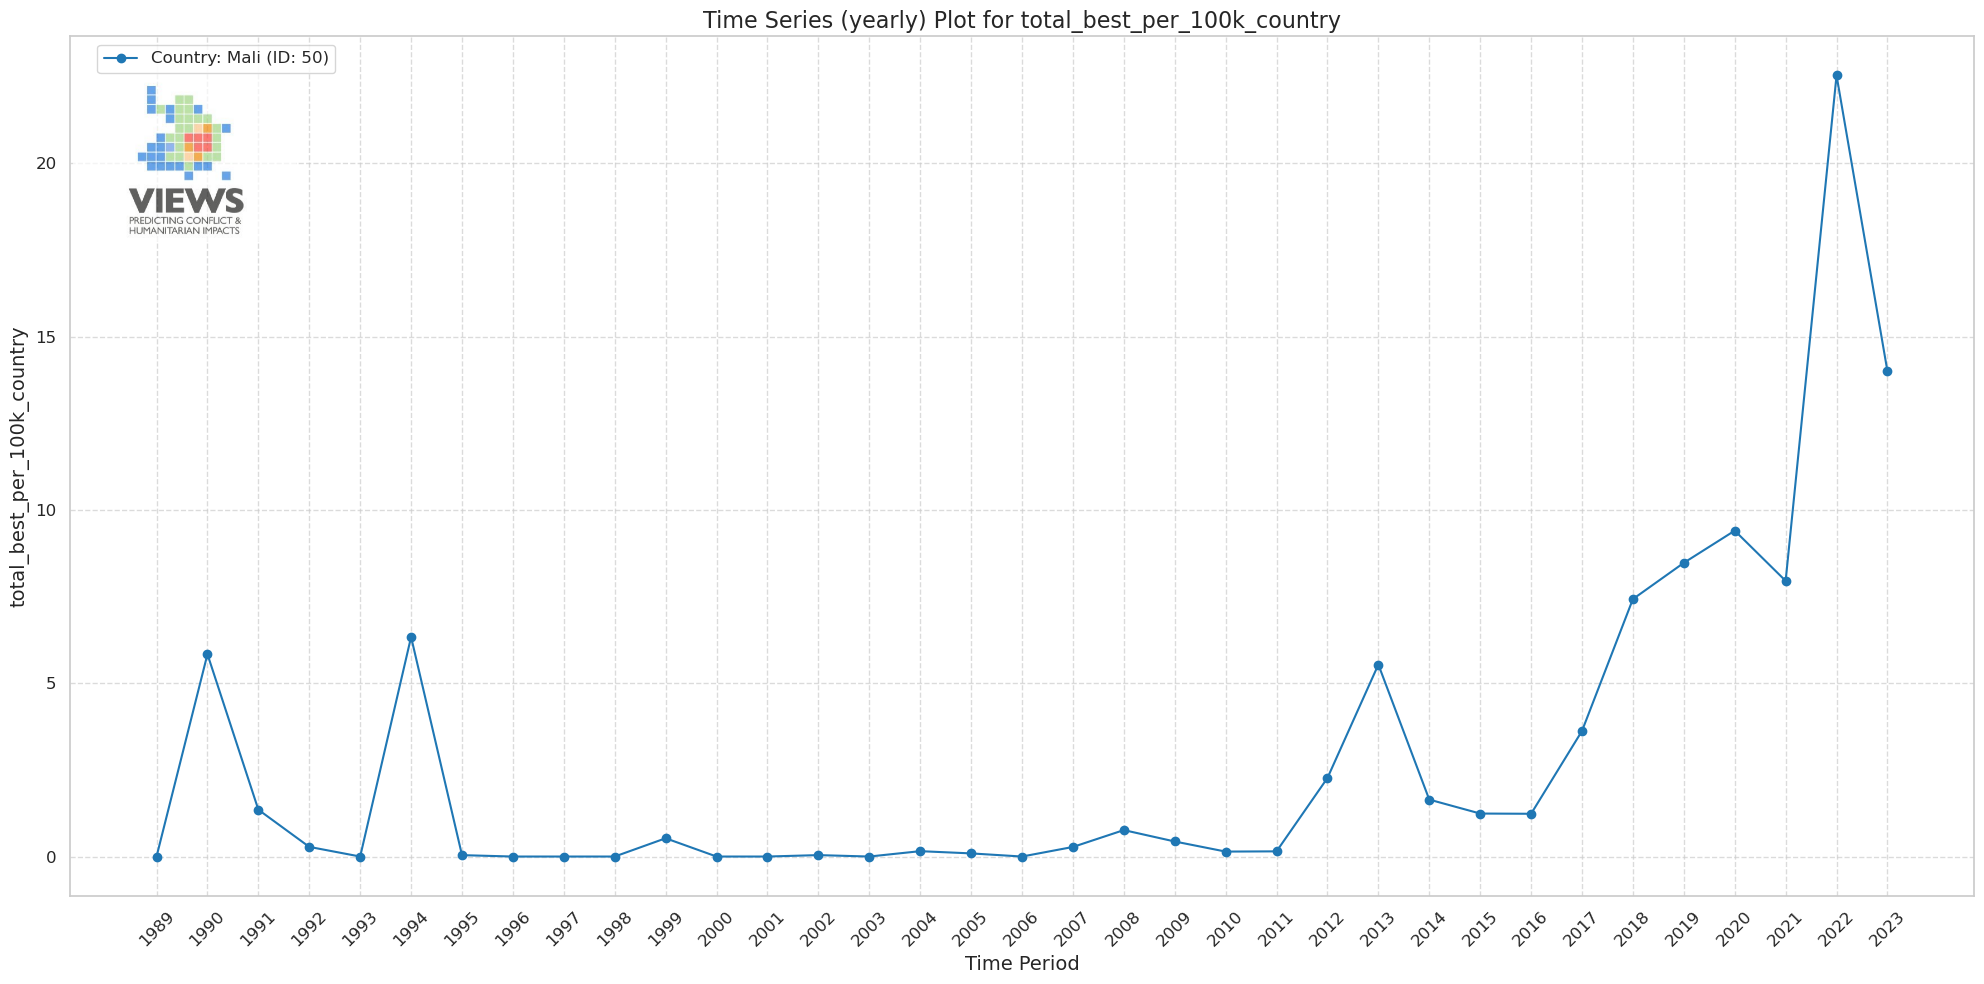

In [24]:
country_ids = [50] # note that this is a list - we'll get back to this
feature = 'total_best_per_100k_country'

plot_country_time_series(df_yearly, country_ids = country_ids, feature=feature, figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1))

And for monthly:

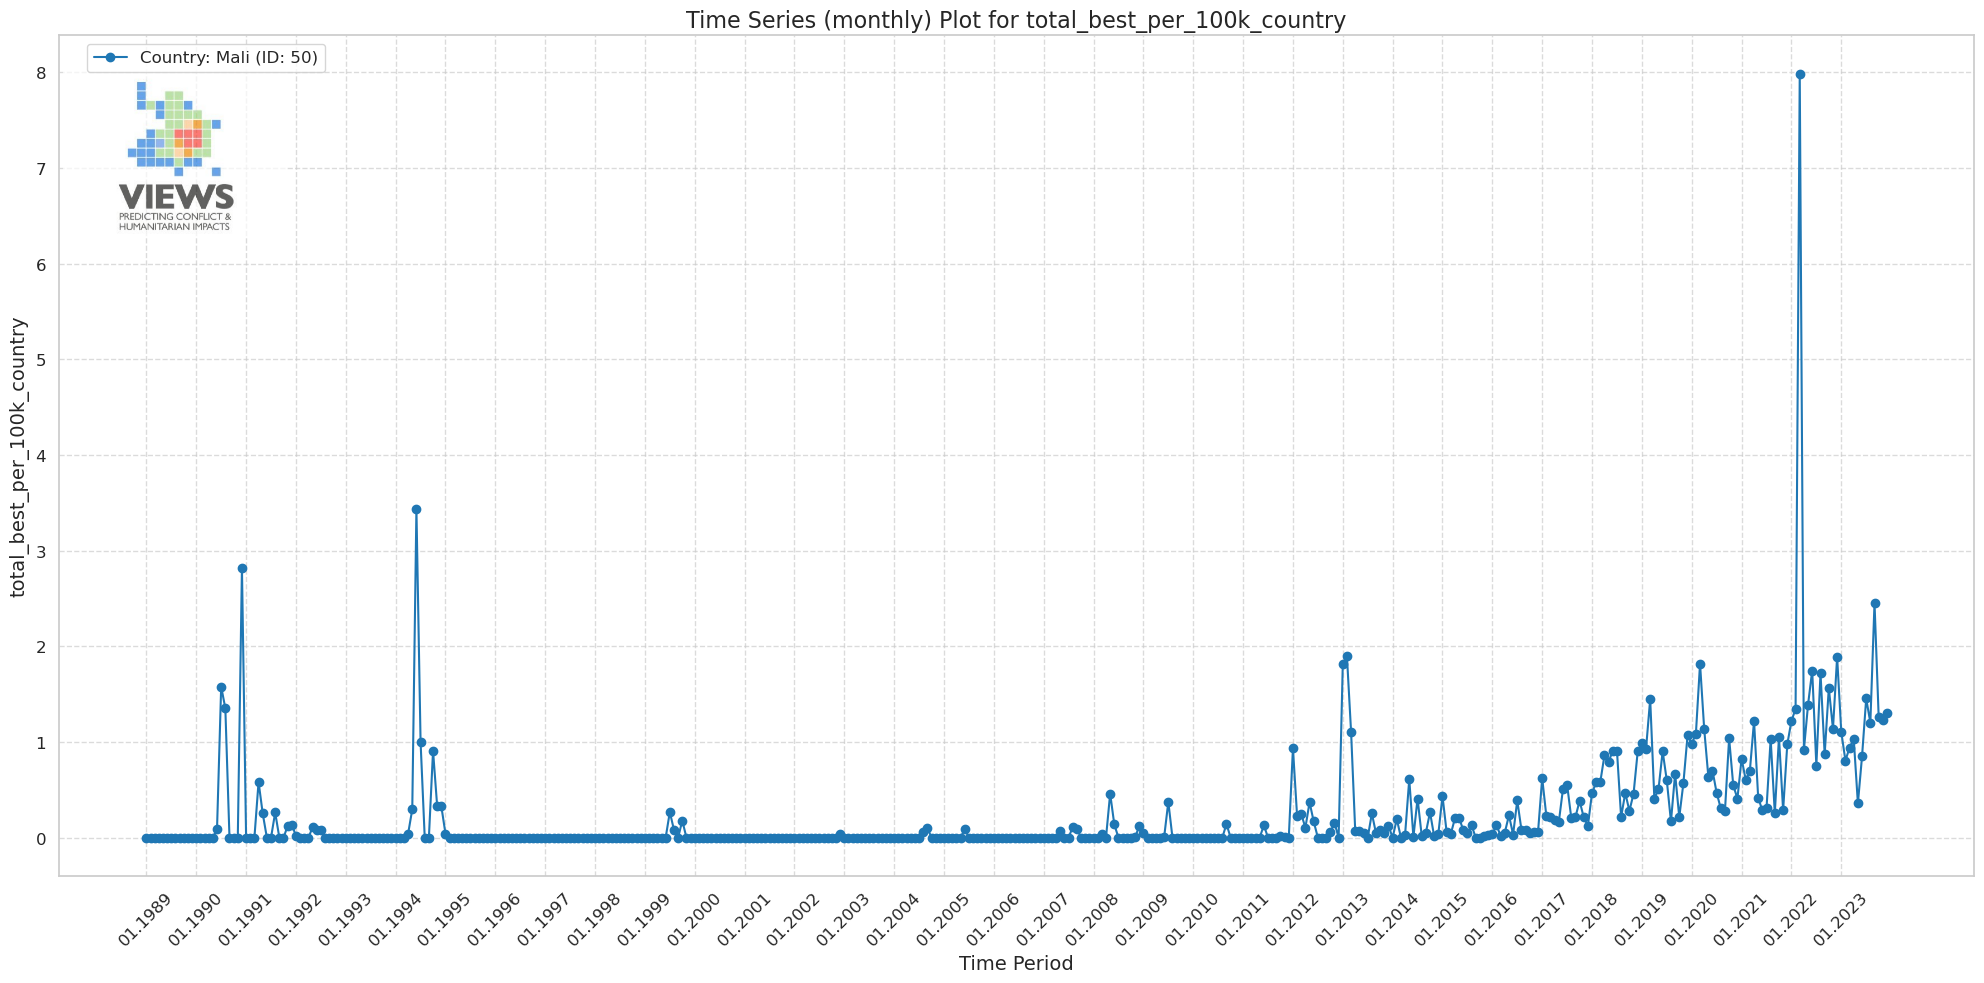

In [25]:
plot_country_time_series(df_monthly, country_ids = country_ids, feature=feature, figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1))

You can enforce a specific color and title:

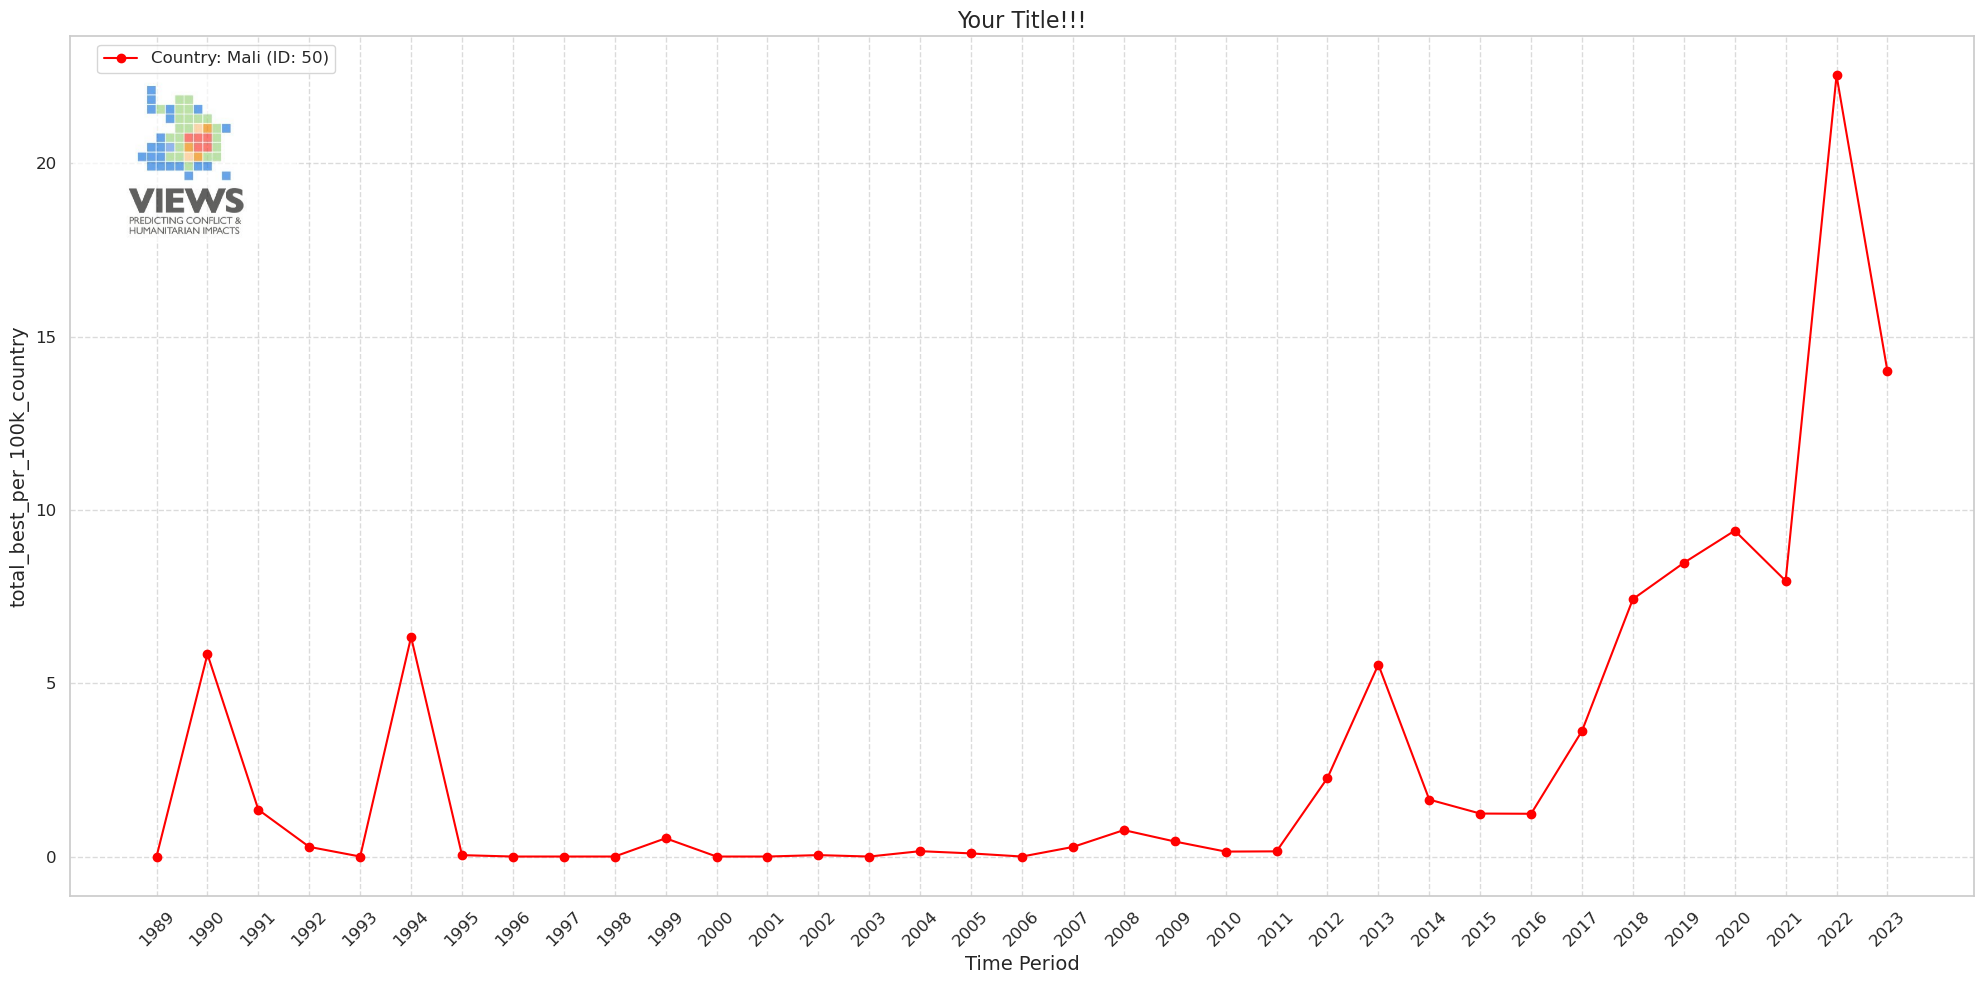

In [26]:
manual_title='Your Title!!!'
force_color = 'red'

plot_country_time_series(df_yearly, [50], 'total_best_per_100k_country', manual_title= manual_title, figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1), force_color=force_color)

We can add more contries:
(though admittedly, depending on the contries you pick, the visuals might suffer a bit given this version. TO be improved)

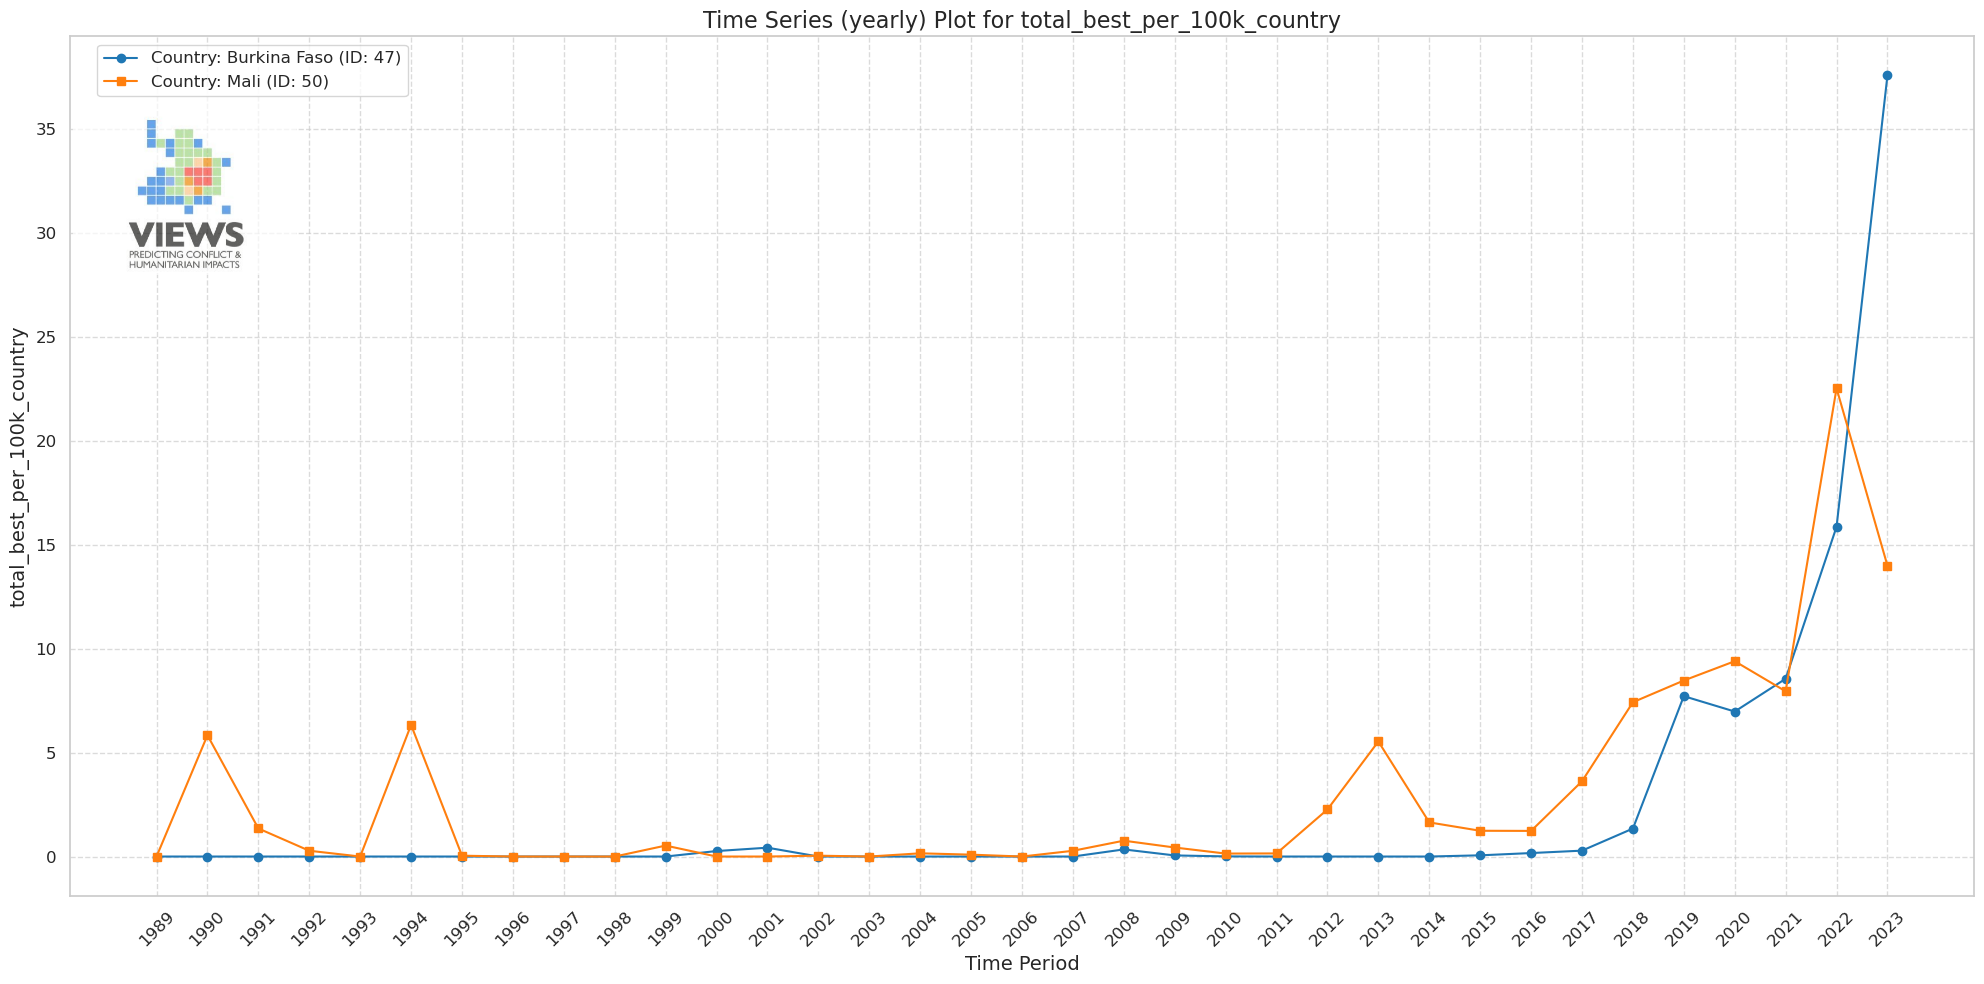

In [27]:
country_ids = [47, 50] # note that this is a list - we'll get back to this
feature = 'total_best_per_100k_country'

plot_country_time_series(df_yearly, country_ids = country_ids, feature=feature, figsize=(20, 10), logo_placement = (0.06, 0.83), logo_size= 0.4, legend_placement=(0.01, 1))

For your convience, plot size, the logo and legend placement and the logo size can be adjusted easily:

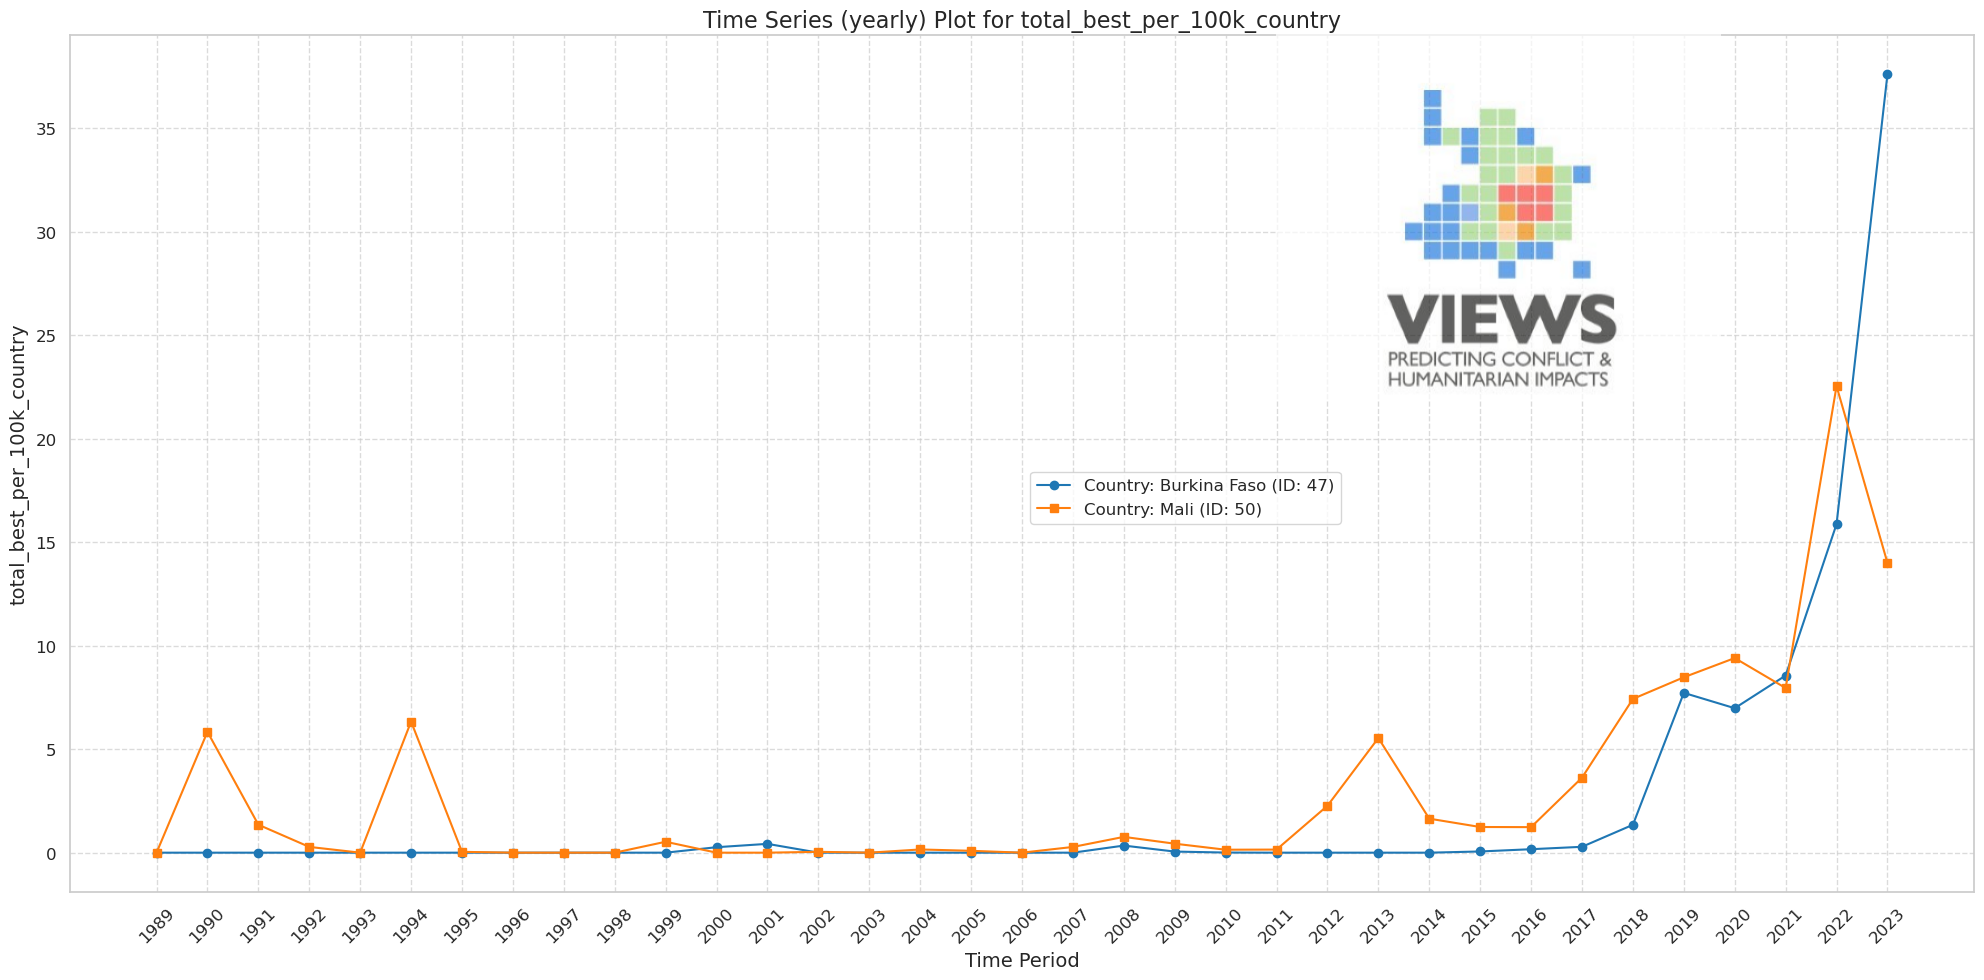

In [28]:
figsize = (20,10)
logo_placement = (0.75, 0.79)
logo_size= 0.8
legend_placement=(0.5, 0.5)

plot_country_time_series(df_yearly, country_ids = country_ids, feature=feature, figsize = figsize, logo_placement = logo_placement, logo_size=logo_size, legend_placement=legend_placement)

**This plots have "save_plot = False/True", "PATH_PLOT = None/[path]" to save the plots. Use PATH_PLOT as shown above**

Now onwards!

# Using the country period map 
The interface id very similar, but lets look at the docstring:

In [29]:
plot_country_period_map?

Signature:
plot_country_period_map(
    df,
    country_id,
    features,
    time_period_ids,
    shared_feature_min_max=False,
    manual_title=None,
    figsize=(16, 8),
    PATH=PosixPath('/home/simon/Documents/scripts/VIEWS_FAO_index/src/utils/utils_plotting_country_period_map.py'),
    logo_placement=(0.9, 0.85),
    logo_size=0.6,
    save_plot=False,
    PATH_PLOT=None,
)
Docstring:
Plots a grid of maps for a given country over specified time periods and features.

Parameters:
df (pd.DataFrame): DataFrame containing the data to be plotted. Must include columns for country ID, time period, row, col, and features.
country_id (int): The ID of the country to be plotted.
features (list of str): List of feature names to be plotted.
time_period_ids (list of int): List of time period IDs to be plotted.
shared_feature_min_max (bool, optional): If True, all subplots of the same feature will share the same color scale. Defaults to False.
manual_title (str, optional): Title for the plot. D

Cool. Lets try to plot a specific contry, doing a specifc month, and one specific feature:

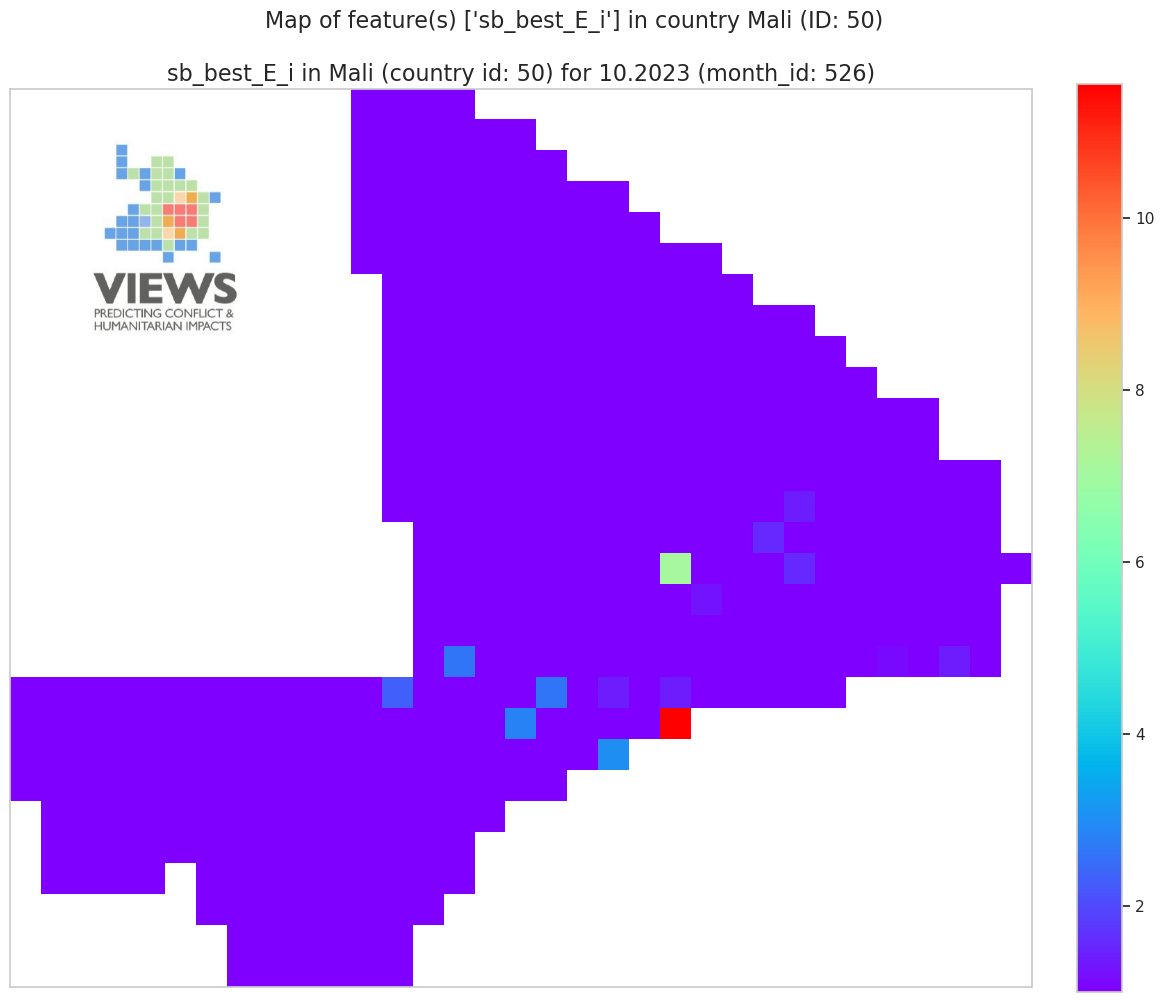

In [30]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i'], time_period_ids= [526], figsize=(12, 10), logo_placement = (0.15, 0.85), logo_size = 0.5)

We can also do a year instead:

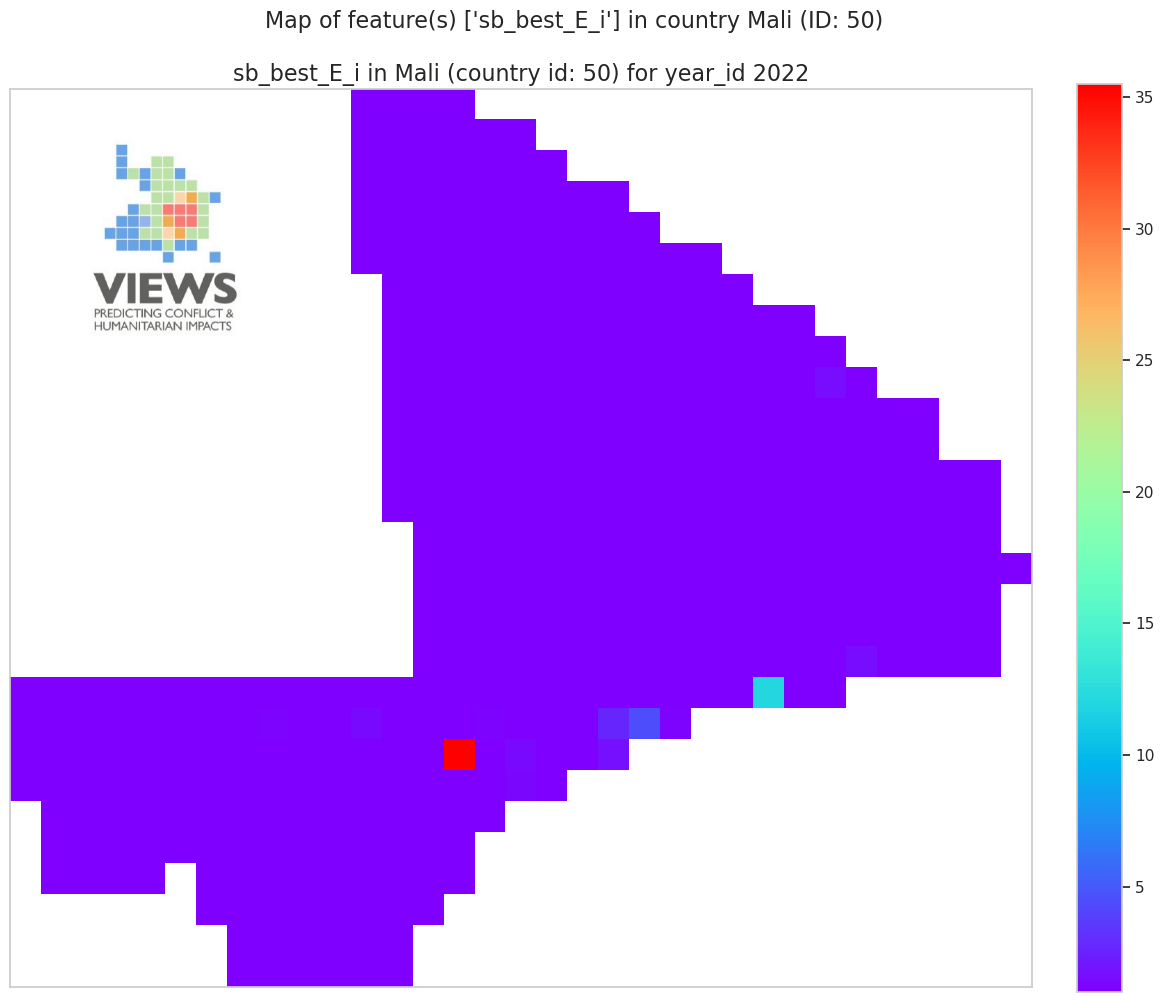

In [31]:
plot_country_period_map(df_yearly, country_id= 50, features= ['sb_best_E_i'], time_period_ids= [2022], figsize=(12, 10), logo_placement = (0.15, 0.85), logo_size = 0.5)

You might be pundering about why both featyre and time period are list. This is so we can see plot multiples at a time!

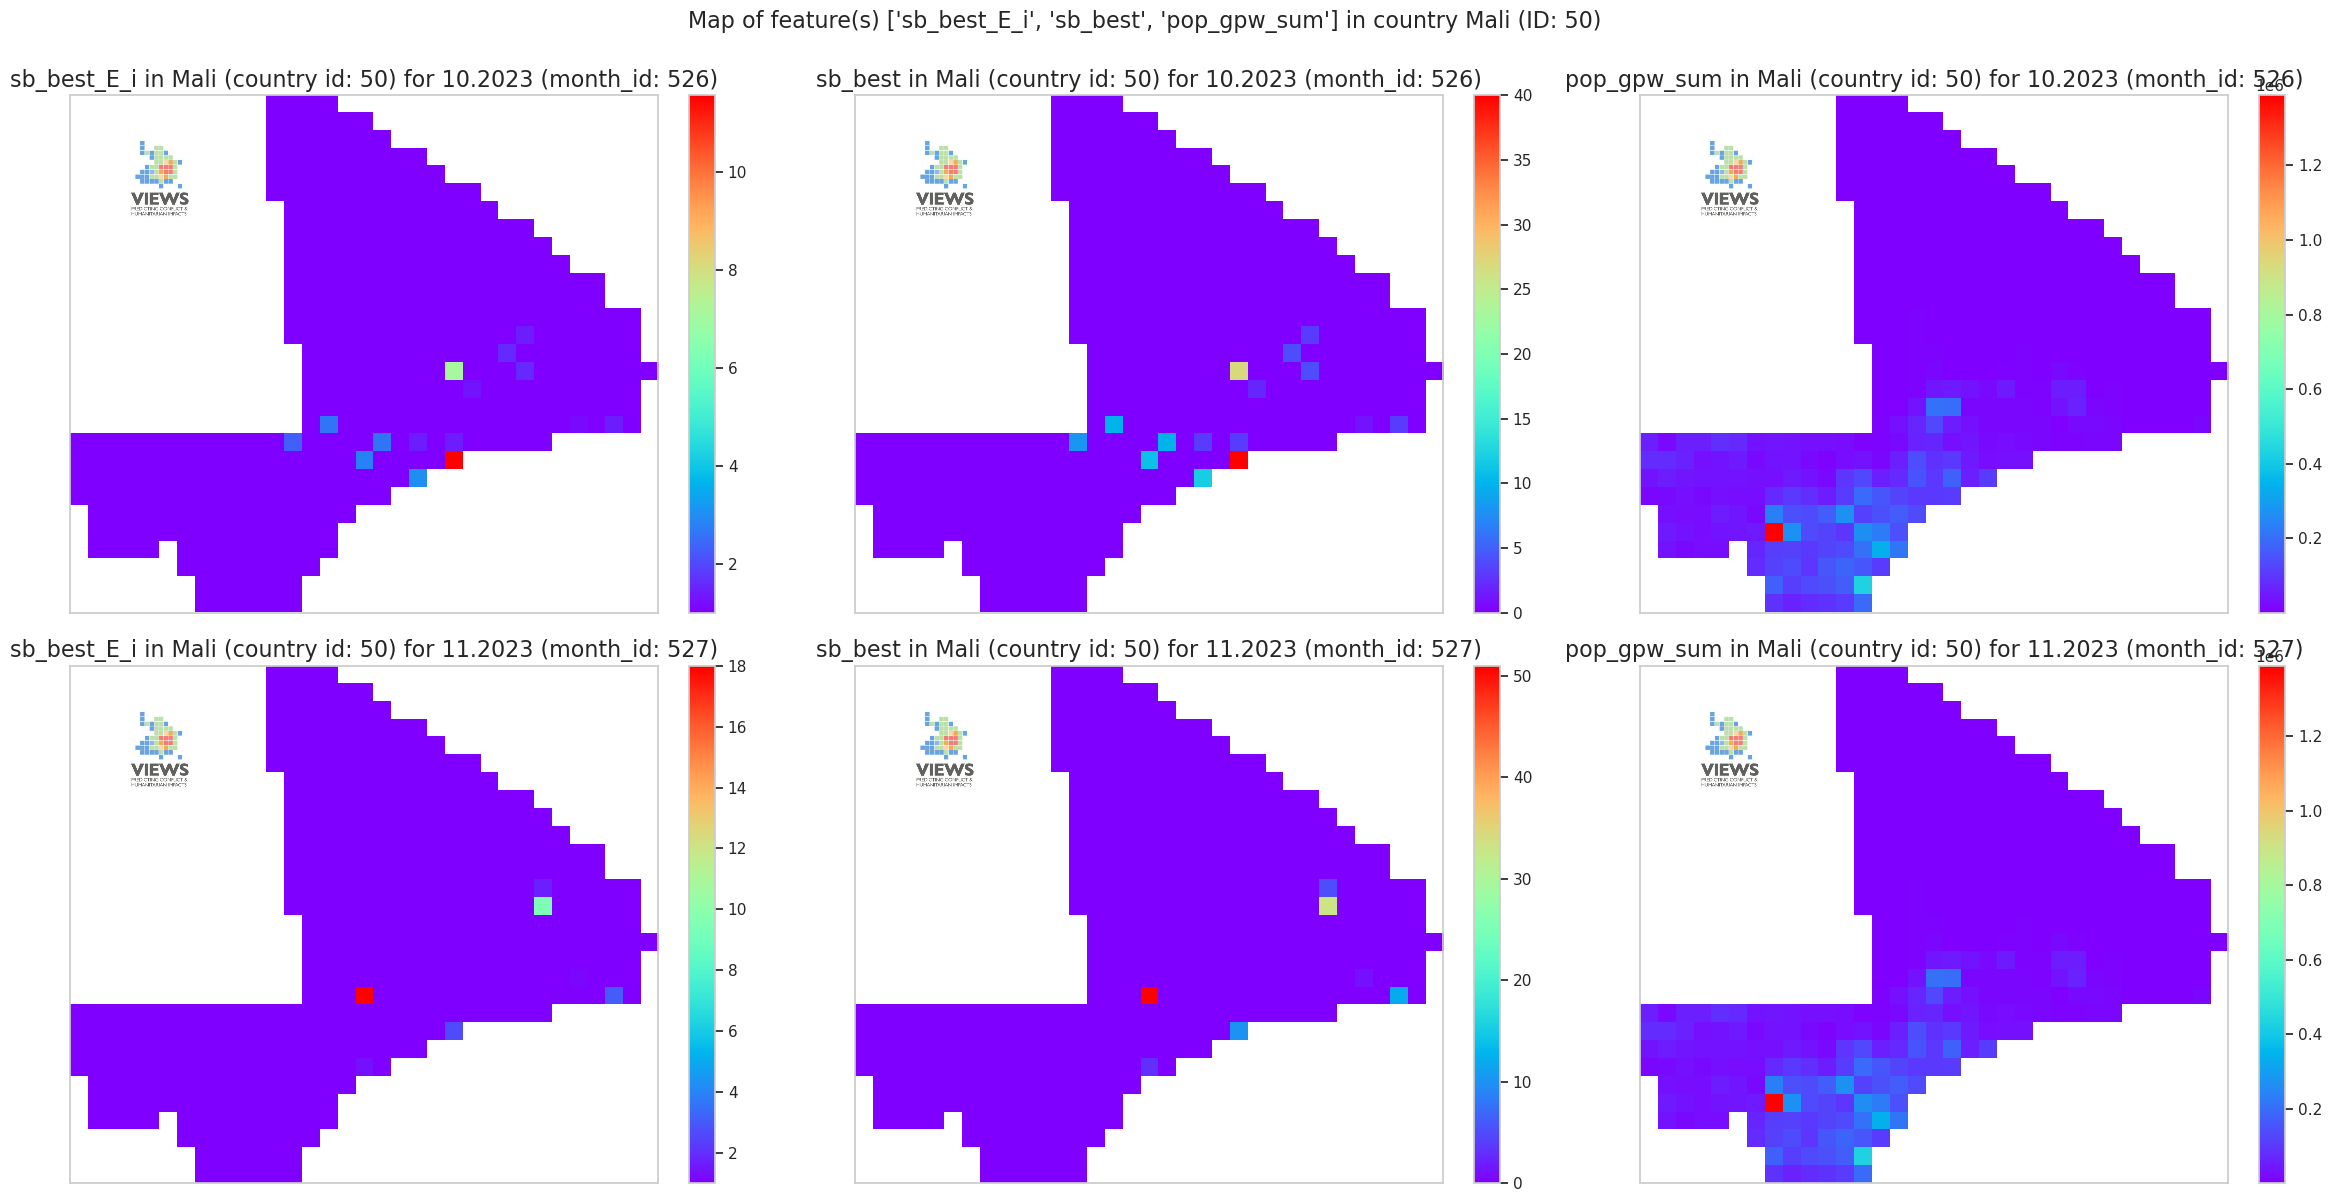

In [32]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i', 'sb_best', 'pop_gpw_sum'], time_period_ids= [526, 527], figsize=(24, 12), logo_placement = (0.15, 0.85), logo_size = 0.2)

**Note: Time periods differs by row and feature by column**

we can enforce a title and enforce that the vmin/vmax of the features across plots should be shared (notice how to colobar now represtens the same scale within each feature)

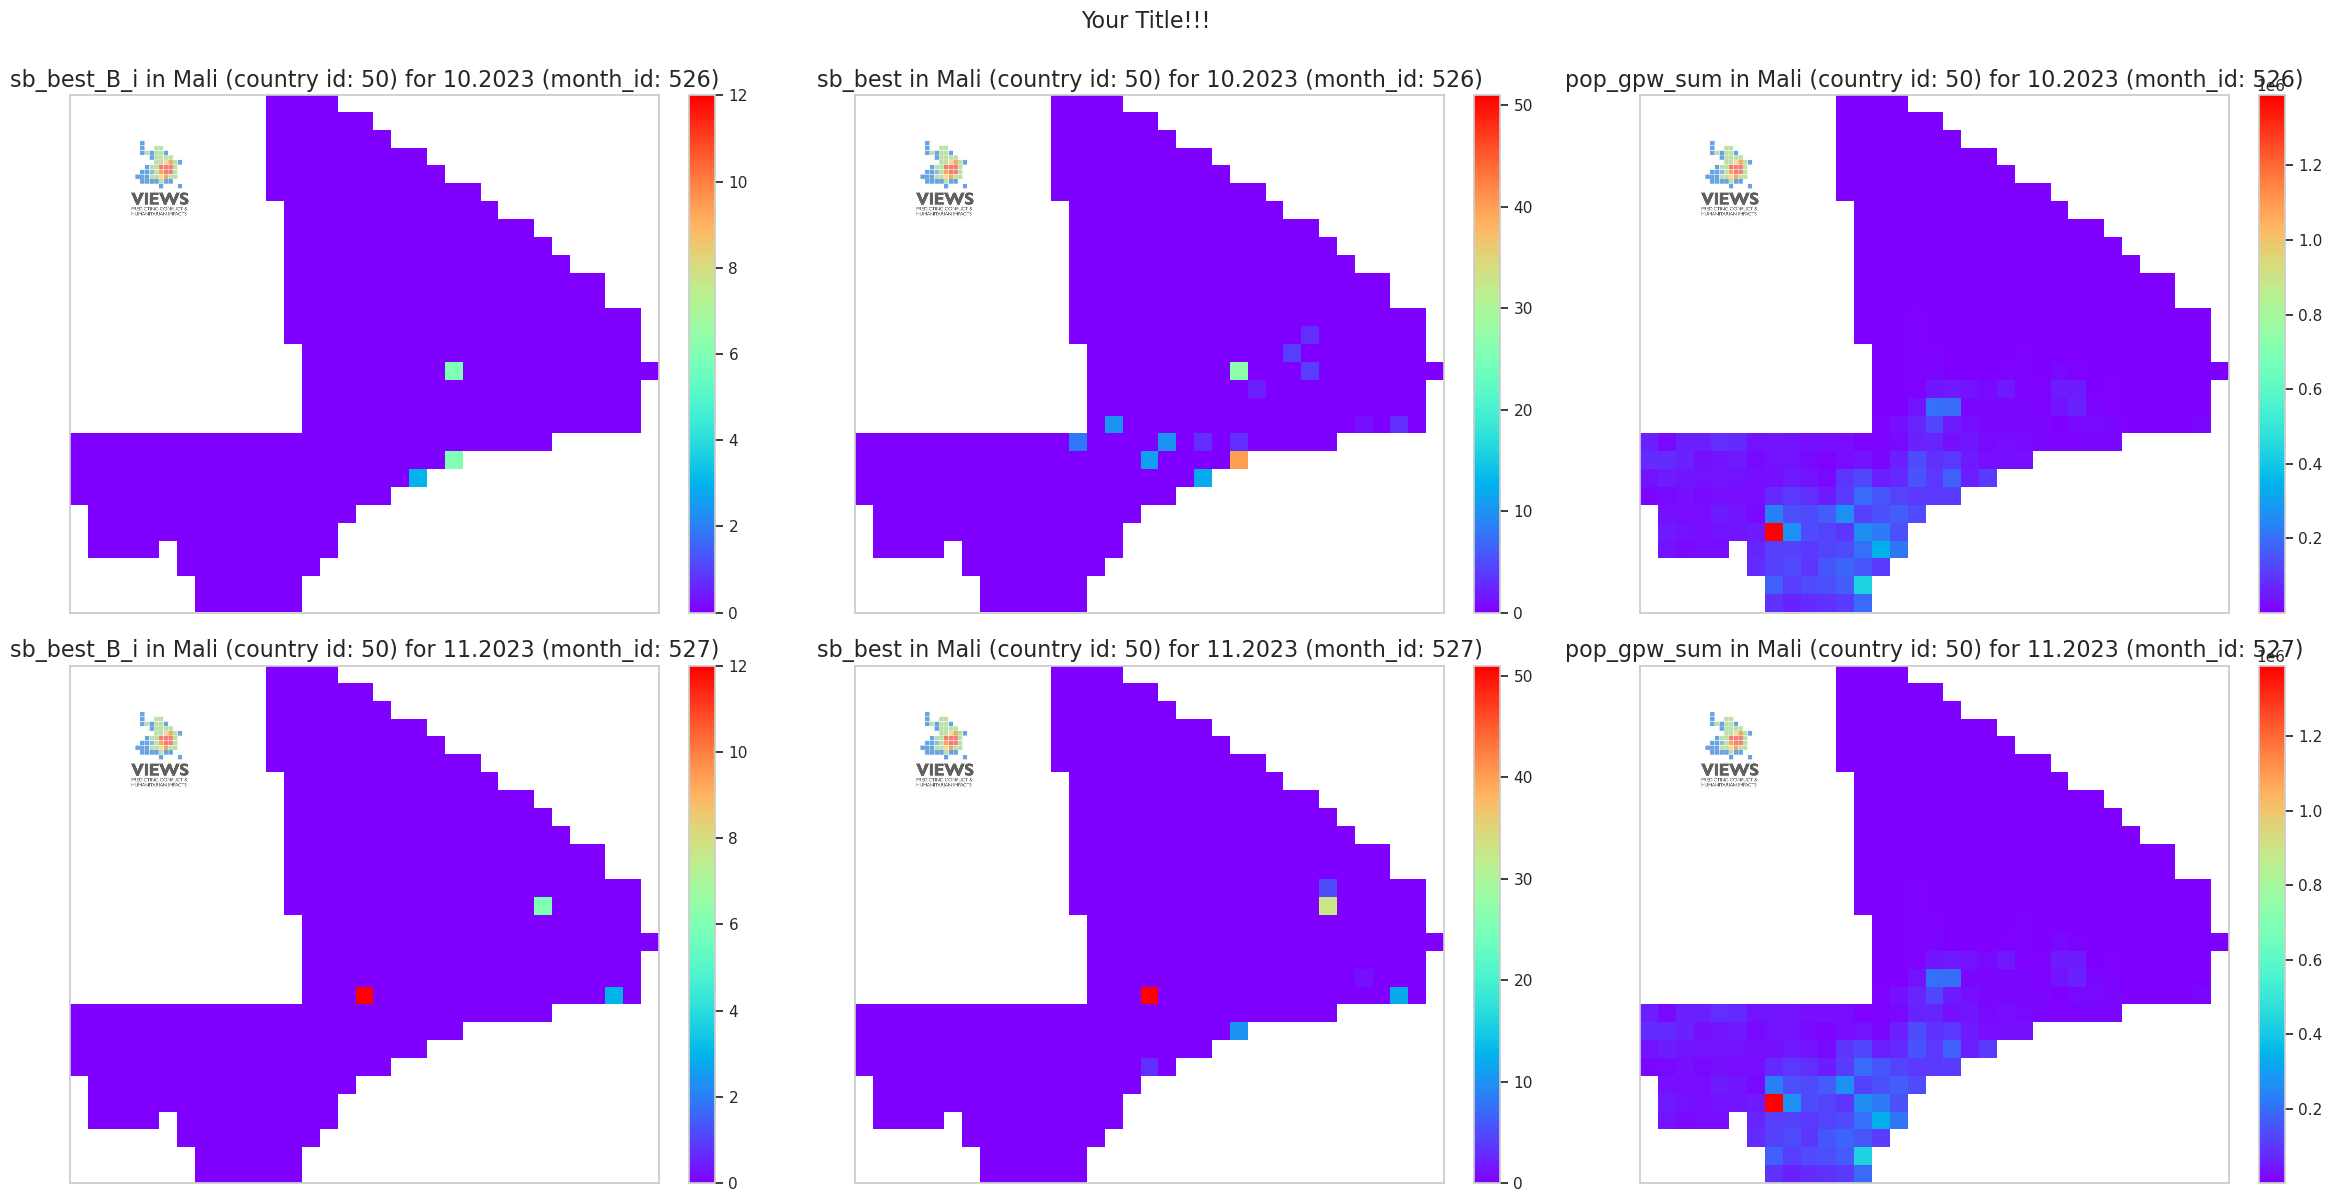

In [33]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_B_i', 'sb_best', 'pop_gpw_sum'], time_period_ids= [526, 527], shared_feature_min_max= True, manual_title='Your Title!!!', figsize=(24, 12), logo_placement = (0.15, 0.85), logo_size = 0.2)

**This plots have "save_plot = False/True", "PATH_PLOT = None/[path]" to save the plots. Use PATH_PLOT as shown above**